In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
dataframe.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [4]:
dataframe.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [5]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

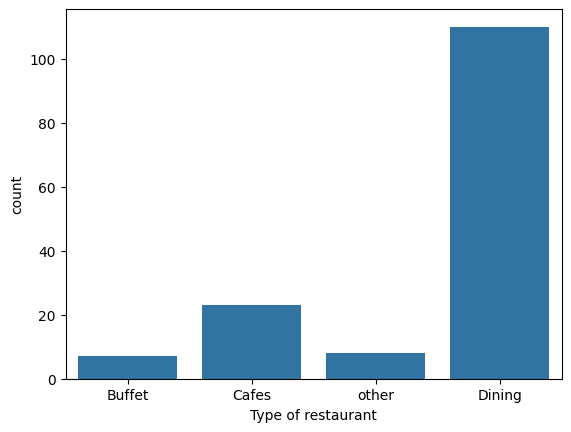

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

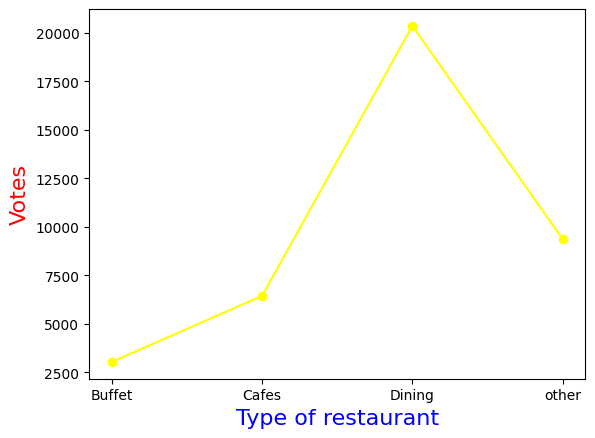

In [9]:
plt.plot(result, c="yellow", marker="o")
plt.xlabel("Type of restaurant", c="Blue", size=16)
plt.ylabel("Votes", c="Red", size=16)

In [10]:

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='count'>

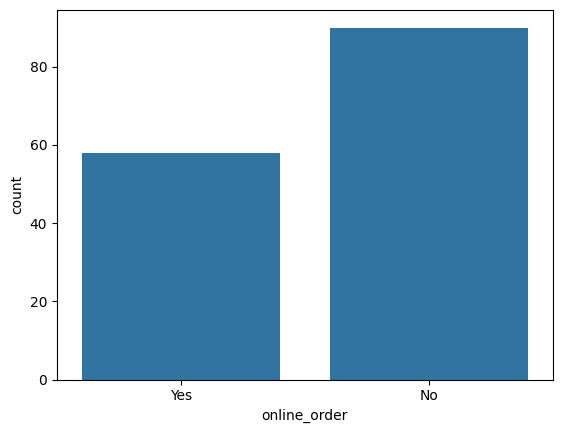

In [12]:
sns.countplot(x=dataframe['online_order'])

In [13]:
dataframe.value_counts('online_order')

online_order
No     90
Yes    58
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

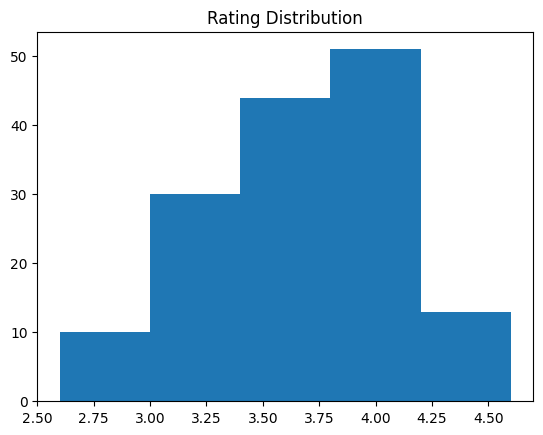

In [14]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

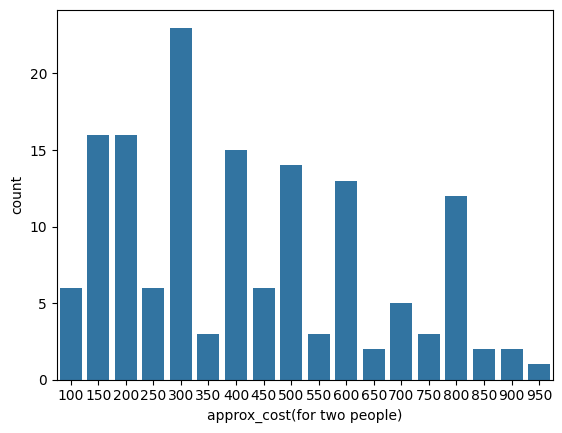

In [15]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

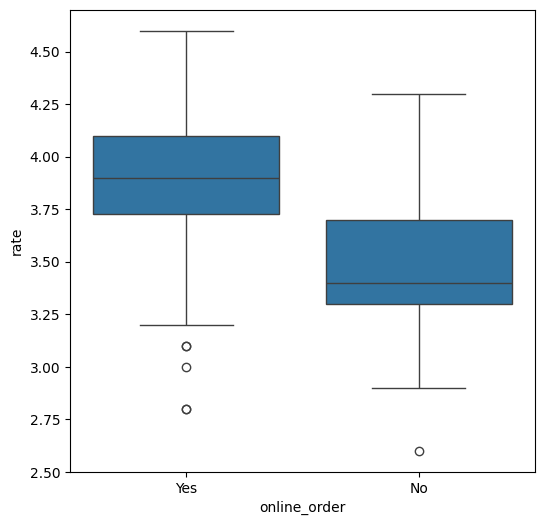

In [16]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

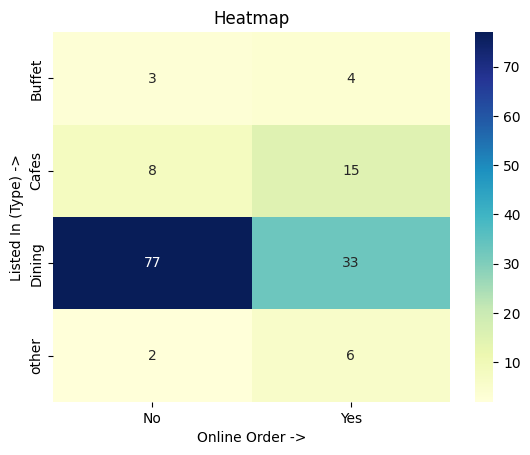

In [17]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order ->")
plt.ylabel("Listed In (Type) ->")
plt.show()